### Primera práctica
1. Leer la imagen compartida mediante meet
1. Redimensionar la imagen en un 50%
2. Convertir a escala de grises y obtener su histograma
3. Obtener el histograma RGB y HSV
4. Ecualizar la imagen en blanco y negro y obtener su histograma
1. Ecualizar la imagen a color por los 3 métodos visto el repaso anterior

In [7]:
# Importar librerías
import cv2 
import matplotlib.pyplot as plt

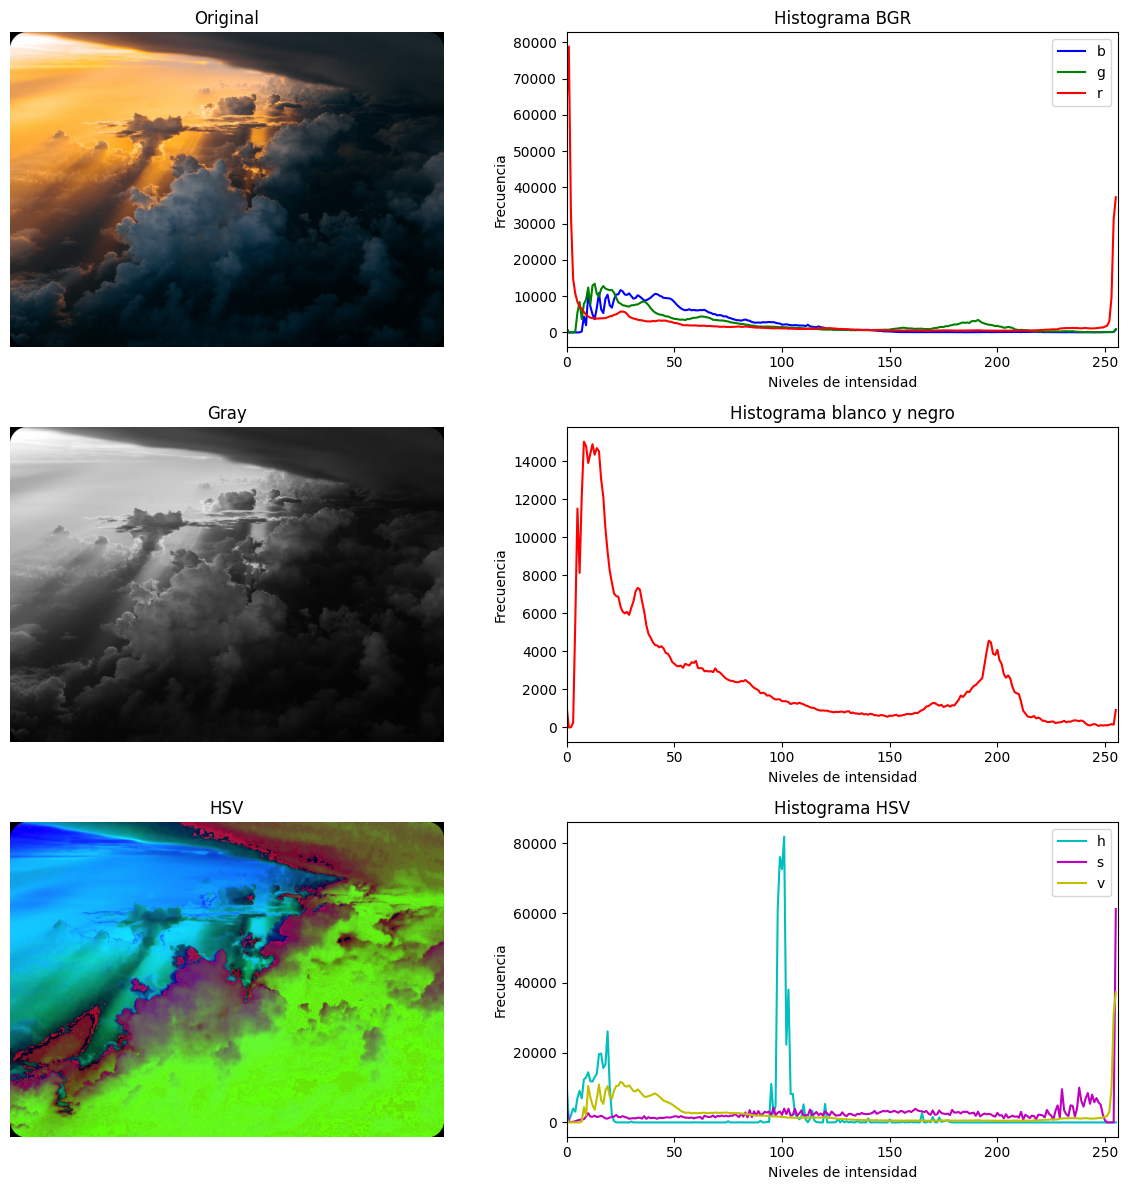

In [12]:
img = cv2.imread("./nubes.png")
img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_grises = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist_grises = cv2.calcHist([img_grises], [0], None, [256], [0, 256])

colors = ['b', 'g', 'r']

plt.figure(figsize=(12, 12))
plt.subplot(3, 2, 1)
plt.imshow(img_rgb, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(3, 2, 2)
i = 0
for col in colors :
    hist_bgr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist_bgr, color=col, label=col)
    i = i + 1
plt.title("Histograma BGR")
plt.xlabel("Niveles de intensidad")
plt.ylabel("Frecuencia")
plt.xlim([0, 256])
plt.legend()

plt.subplot(3, 2, 3)
plt.imshow(img_grises, cmap='gray')
plt.title("Gray")
plt.axis('off')

plt.subplot(3, 2, 4)
plt.plot(hist_grises, color='r')
plt.title("Histograma blanco y negro")
plt.xlabel("Niveles de intensidad")
plt.ylabel("Frecuencia")
plt.xlim([0, 256])

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.subplot(3, 2, 5)
plt.imshow(img_hsv)
plt.title("HSV")
plt.axis('off')

plt.subplot(3, 2, 6)
hsv_colors = ['h', 's', 'v']
colh = ['c', 'm', 'y']
i = 0
for i in range(0, 3) :
    hist_hsv = cv2.calcHist([img_hsv], [i], None, [256], [0, 256])
    plt.plot(hist_hsv, color=colh[i], label=hsv_colors[i])
plt.title("Histograma HSV")
plt.xlabel("Niveles de intensidad")
plt.ylabel("Frecuencia")
plt.xlim([0, 256])
plt.legend()

plt.tight_layout()
plt.show()

#### Ecualización de la imagen

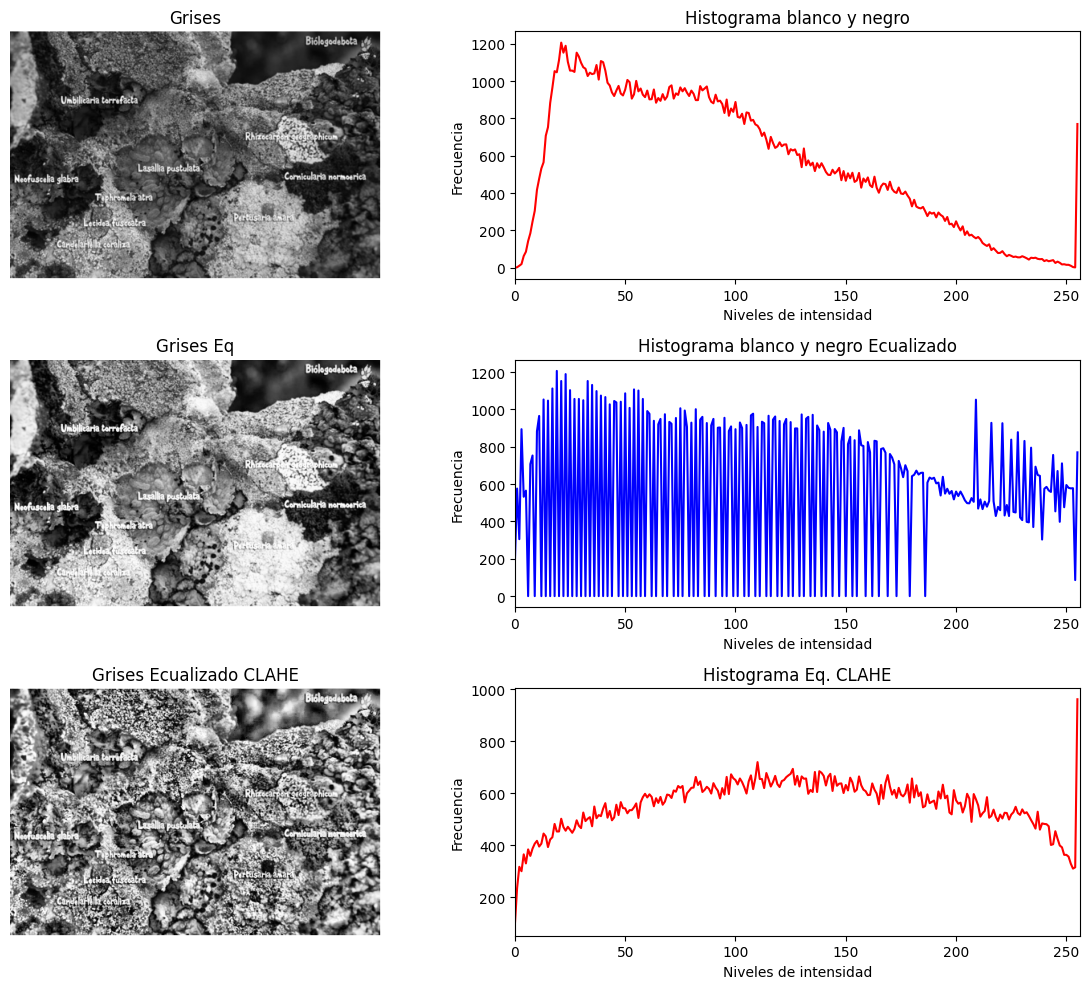

In [9]:
img_grises_eq = cv2.equalizeHist(img_grises)
hist_grises_eq = cv2.calcHist([img_grises_eq], [0], None, [256], [0, 256])

clahe = cv2.createCLAHE(clipLimit=20.0 , tileGridSize=(16, 16))
img_grises_eq_clahe = clahe.apply(img_grises)

hist_gray_eq_clahe = cv2.calcHist([img_grises_eq_clahe], [0], None, [256], [0, 256])


plt.figure(figsize=(12, 10))
plt.subplot(3, 2, 1)
plt.imshow(img_grises, cmap='gray')
plt.title("Grises")
plt.axis('off')

plt.subplot(3, 2, 2)
plt.plot(hist_grises, color='r')
plt.title("Histograma blanco y negro")
plt.xlabel("Niveles de intensidad")
plt.ylabel("Frecuencia")
plt.xlim([0, 256])

plt.subplot(3, 2, 3)
plt.imshow(img_grises_eq, cmap='gray')
plt.title("Grises Eq")
plt.axis('off')

plt.subplot(3, 2, 4)
plt.plot(hist_grises_eq, color='b')
plt.title("Histograma blanco y negro Ecualizado")
plt.xlabel("Niveles de intensidad")
plt.ylabel("Frecuencia")
plt.xlim([0, 256])

plt.subplot(3, 2, 5)
plt.imshow(img_grises_eq_clahe, cmap='gray')
plt.title("Grises Ecualizado CLAHE")
plt.axis('off')


plt.subplot(3, 2, 6)
plt.plot(hist_gray_eq_clahe, color='r')
plt.title("Histograma Eq. CLAHE")
plt.xlabel("Niveles de intensidad")
plt.ylabel("Frecuencia")
plt.xlim([0, 256])


plt.tight_layout()
plt.show()

#### Ecualización de la imagen a color
Para esto se trabaja con los 3 espacios de color que cuentan con una capa de luminosidad, entre ellos se encuentran
1. HSV (La capa V tiene la luminosidad)
1. YUV (La capa Y)
1. YCrCb (La capa Y)

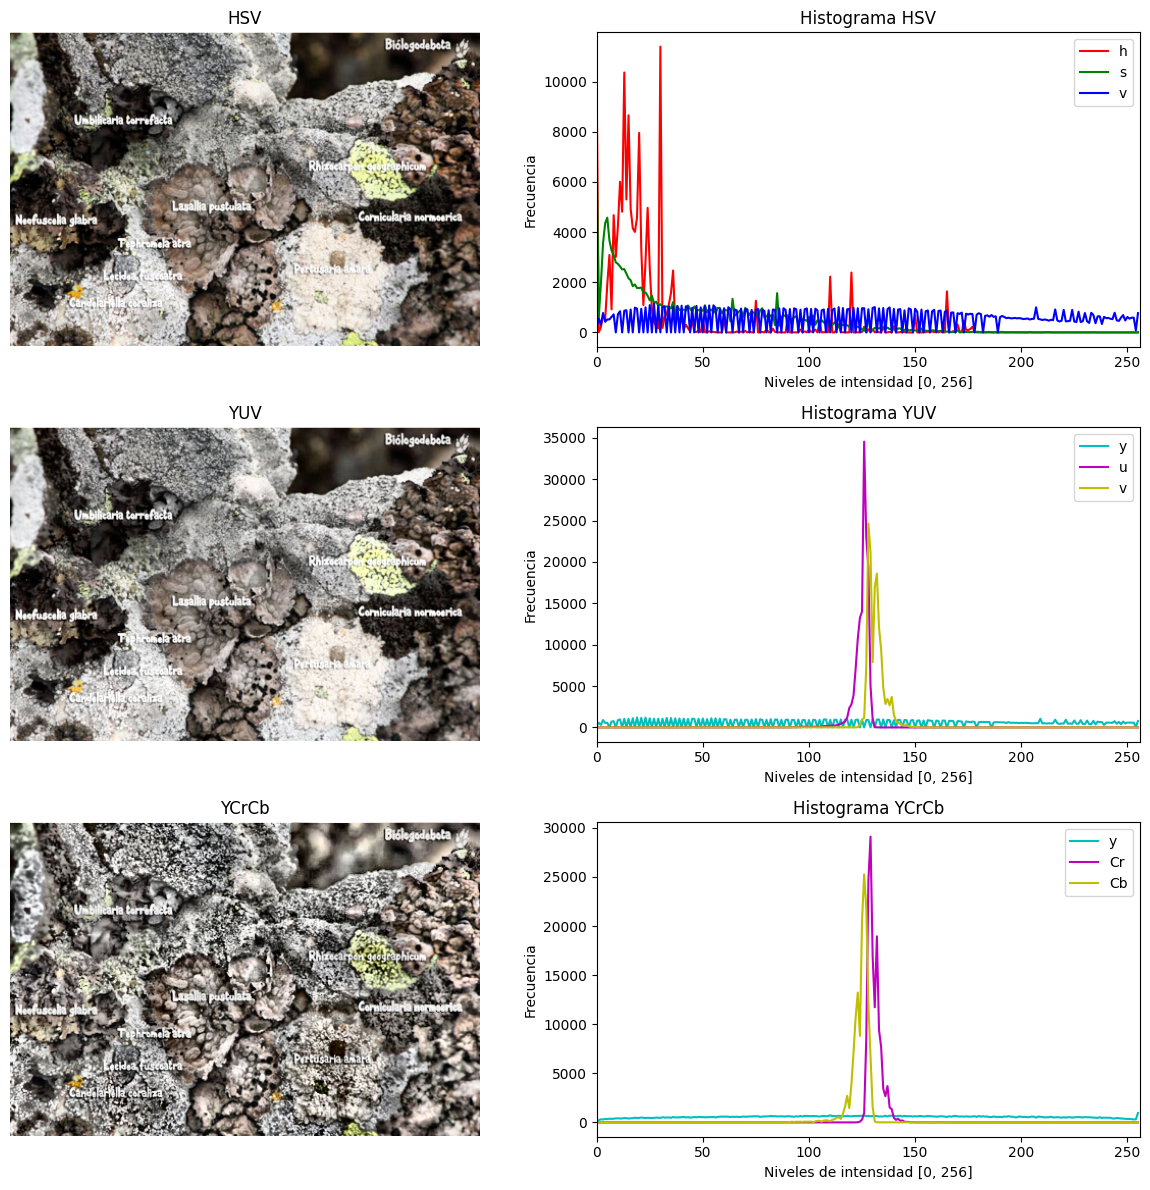

In [10]:
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
img_yrb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

h, s, v = cv2.split(img_hsv)
v_eq = cv2.equalizeHist(v)
img_hsv_eq = cv2.merge((h, s, v_eq))
img_hsv_eq_rgb = cv2.cvtColor(img_hsv_eq, cv2.COLOR_HSV2RGB)

img_yuv[:,:, 0] = cv2.equalizeHist(img_yuv[:,:,0])
img_yuv_eq_rgb = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

clahe1 = cv2.createCLAHE( clipLimit=20.0, tileGridSize=(16,16))
img_yrb[:,:,0] = clahe1.apply(img_yrb[:,:,0])
# img_yrb[:,:,0] = cv2.equalizeHist(img_yrb[:,:,0])
img_yrb_eq_rgb = cv2.cvtColor(img_yrb, cv2.COLOR_YCrCb2RGB)


plt.figure( figsize=(12, 12))
plt.subplot(3, 2, 1)
plt.imshow(img_hsv_eq_rgb)
plt.title("HSV")
plt.axis('off')


plt.subplot(3, 2, 2)
colors_hsv = ["r","g", "b"]
et_hsv=["h", "s", "v"]

plot_hist_color(colors_hsv, img_hsv_eq, "HSV", et_hsv)


plt.subplot(3, 2, 3)
plt.imshow(img_yuv_eq_rgb)
plt.title("YUV")
plt.axis('off')

plt.subplot(3, 2, 4)
colors_yuv = ["c", "m", "y"]
et_yuv=["y", "u", "v"]
plot_hist_color(colors_yuv, img_yuv, "YUV", et_yuv)

plt.subplot(3, 2, 5)
plt.imshow(img_yrb_eq_rgb)
plt.title("YCrCb")
plt.axis('off')

plt.subplot(3, 2, 6)
et_yrb=["y","Cr","Cb"]
plot_hist_color(colors_yuv, img_yrb, "YCrCb", et_yrb)


plt.tight_layout()
plt.show()

### Función para generalizar la gráfica de los histogramas

In [11]:
def plot_hist_color(colors, img, title, labels) :
    for i in range( len(colors) ) :
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=colors[i], label=labels[i])
        plt.title("Histograma "+title)
        plt.legend()
        plt.xlabel("Niveles de intensidad [0, 256]")
        plt.ylabel("Frecuencia")
        plt.xlim([0, 256])
        